# Model description and prediction

In [1]:
### Model description 
from keras.models import load_model
import tensorflow as tf



model = load_model('model.h5')

model.summary()

# Here I have used a pretrained Keras model as transfer learning and I have added new layers and trained them in new dataset. This model is trained to classify food images in 11 classes. 

ModuleNotFoundError: No module named 'keras'

In [2]:
g = tf.Graph()
with g.as_default():
    model = load_model('model.h5')
    

In [3]:
import config
import preprocess as pp

### data preprocess and predictions

size = model.input_shape[1:3]

image_generator, image_class, image_label = pp.image_data_preprocess(config.test_data_path, size)
with g.as_default():
    predictions, predictions_idxs = pp.make_predictions(model,image_generator)


Found 110 images belonging to 11 classes.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [5]:
print(predictions[100].shape)

(11,)


# 1. Functionality Analysis


## 1.1 Model Classification Report

In [5]:
import functionality_analysis as fa

Classification_Report  = fa.model_classification_report(image_class, predictions_idxs,image_label)

[INFO] Classification Report: 
               precision    recall  f1-score   support

        bread       0.64      0.70      0.67        10
dairy_product       0.83      0.56      0.67         9
      dessert       0.53      0.90      0.67        10
          egg       0.70      0.70      0.70        10
   fried_food       0.88      0.70      0.78        10
         meat       1.00      0.80      0.89        10
        pasta       1.00      1.00      1.00        10
         rice       1.00      0.90      0.95        10
      seafood       0.82      0.90      0.86        10
         soup       0.91      1.00      0.95        10
    vegetable       1.00      0.82      0.90        11

     accuracy                           0.82       110
    macro avg       0.85      0.82      0.82       110
 weighted avg       0.85      0.82      0.82       110



## 1.2 Confusion Matrix


In [6]:
Confusion_Matrix = fa.model_confusion_matrix(image_class, predictions_idxs)


[INFO] Confusion matrix : 
[[ 7  0  1  0  1  0  0  0  1  0  0]
 [ 0  5  3  1  0  0  0  0  0  0  0]
 [ 0  0  9  1  0  0  0  0  0  0  0]
 [ 1  0  2  7  0  0  0  0  0  0  0]
 [ 1  0  1  0  7  0  0  0  0  1  0]
 [ 2  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  1  0  0]
 [ 0  0  0  1  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0]
 [ 0  1  1  0  0  0  0  0  0  0  9]]


# 2. Comprehensability Analysis


## 2.1 Heatmap 


#### Heatmap is a method which is used to explain the model's predicition. It shows where the network 'looks' to make the classification. 


In [7]:
# Classify the input image
import numpy as np
size = (229,229)
image_array, array_shape = pp.get_img_array(config.image_path,size)
image_array = np.expand_dims(image_array, axis=0)
with g.as_default():
    prediction = model.predict(image_array)
    prediction_class = np.argmax(prediction)
    print(prediction_class)


3


#### The model classifies the input image as an egg which corresponds to the class nr.3 
#### To see where the model "looks" on the picture in order to classify it we use heatmaps. 


Explanation(estimator='functional_1', description='Grad-CAM visualization for image classification; \noutput is explanation object that contains input image \nand heatmap image for a target.\n', error='', method='Grad-CAM', is_regression=False, targets=[TargetExplanation(target=3, feature_weights=None, proba=None, score=0.80664366, weighted_spans=None, heatmap=array([[0.12647224, 0.37069498, 0.6059071 , 0.67519995, 0.39070448],
       [0.        , 0.76741181, 0.91232444, 0.99999906, 0.45563281],
       [0.        , 0.98126521, 0.98570863, 0.31157241, 0.        ],
       [0.        , 0.62662734, 0.73644308, 0.51919676, 0.        ],
       [0.        , 0.25820739, 0.51725945, 0.27444024, 0.        ]]))], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=<PIL.Image.Image image mode=RGB size=229x229 at 0x28211A49340>)


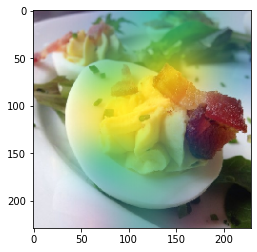

In [8]:
import heatmap as htm
heatmap = htm.get_heatmap(config.model_path, config.image_path)

#### The region in the center is highlighted, which indeed shows the central part of the egg. 

Explanation(estimator='functional_1', description='Grad-CAM visualization for image classification; \noutput is explanation object that contains input image \nand heatmap image for a target.\n', error='', method='Grad-CAM', is_regression=False, targets=[TargetExplanation(target=7, feature_weights=None, proba=None, score=0.4887854, weighted_spans=None, heatmap=array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.77285814, 0.33814348, 0.52016765, 0.        , 0.06215788],
       [0.83025263, 0.99999826, 0.759206  , 0.20513717, 0.5466518 ],
       [0.98186907, 0.91126974, 0.        , 0.        , 0.57685273],
       [0.45688136, 0.00843147, 0.        , 0.26016814, 0.70386761]]))], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=<PIL.Image.Image image mode=RGB size=229x229 at 0x282232E07C0>)


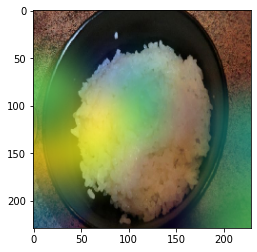

In [9]:
# Another example with another picture 

image_path_2 = 'food-11\\test_100\\rice\\7_45.jpg'
heatmap_2 = htm.get_heatmap(config.model_path, image_path_2)

## 2.2 Anchor

#### Anchor image explainer  splits the image into superixles in order to generate meaningful explainations for the image. 

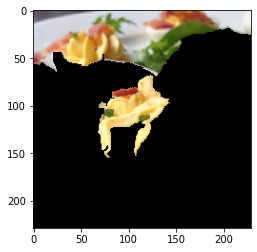

In [10]:
import anchor 

anchor = anchor.anchor_generator(config.model_path, config.image_path)

#### This photo shows that only a small fraction of the upper and middle part of the image is sufficient to explain the egg

## 2.3 Counterfactuals

Instructions for updating:
non-resource variables are not supported in the long term

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Counterfactual prediction: 8 with probability 0.983953058719635


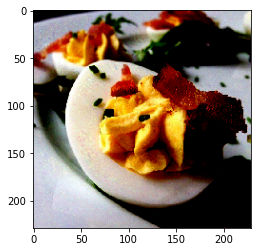

In [11]:
import countefactuals as cf
with g.as_default():
    countefactuals = cf.C_F(config.model_path, config.image_path)

In [ ]:
#### Counterfactual starting from the class 3 (eggs) moves towards the closses class, which in this case is 8 (seafood), as determined by the the model and data. Typically the first iterations find counterfactuals that are out of the distribution,  while later iterations make the counterfactual more interpretable and sparse. 

# 3. Robustness

## 3.1 Adversarial Attack

#### The goal of the adversary attack is to missclassify the input image, which was previosly classified correctly by the model. It does that by perturbing the image and yet the perturbed image looks identical with the original one. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


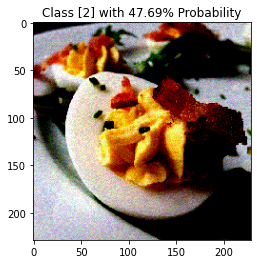

In [16]:
import adversarial_attack as aa 
import config

adv = aa.create_adversarial(config.image_path, config.model_path, eps=0.08)


In [ ]:
#### The new perturbed image is classified as dessert (class 2) by the model with the probability of 47 %. The smaller the epsilon value --> the smaller pertubation and more accurate the predicition. The larger the epsilon the --> the larger the perturbation and less accurate the predicition. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


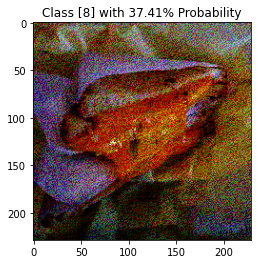

In [14]:
image_path_2 = 'food-11\\test_100\\bread\\0_46.jpg'

adv_2 = aa.create_adversarial(image_path_2, config.model_path, eps=0.16)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


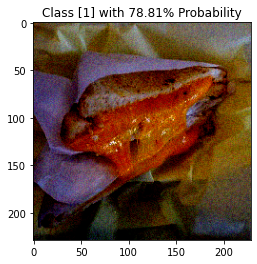

In [15]:
adv_2 = aa.create_adversarial(image_path_2, config.model_path, eps=0.06)


# Task 5

#### The quality report might be expanded by adding other analyses such as :

1. From functionality analyses

    * Fairness 
    * Reliability 
    * Generalization 

2. Comprehensbility

    * Dimensionaliy Reduction
    * Surrogate Model Extraction

In order to enable models with different datatypes, framework or tasks, one should use model-agnostic methods. With model-agnostic methods, it is easy to explain any type of ML model.

* Some of the methods that I have used here are model agnostic such as Anchors. This method use an algorithm that computes explainations for any Black-Box model. The idea behind anchors is to sufficiently explain complex systems locally. This method can be used for image classification and text classification. 

    * The algorithm suffers from a highly configurable and impactful setup, just like most              perturbation-based explainers.

* Another method used here is: Counterfactuals. The counterfactual explainer works on fully black-box models, meaning that they can work with arbitrary functions that take arrays and return arrays. In the context of a machine learning classifier X would be an instance of interest and Y would be the label predicted by the model. The task of finding a counterfactual explanation is then to find some X′ that is in some way related to the original instance X but leading to a different prediction Y′.


    * Challenge --> for earch instance you have to find multiple counterfactual explenations.           This is not convinient since most people want simple explenations. If one finds multiple          counterfactual explainations, it not clear if he has to consider all of them. In some cases       it might be advantageous and in some cases not.

* Heatmap - The heatmap used here is based on the Grad-CAM, a technique which  uses the class-specific gradient information flowing into the final convolutional layer of a CNN to produce a coarse localization map of the important regions in the image. 

* Adversarial_attack - are small, intentional feature perturbations that cause a machine learning model to make false predicitions. Adversarial examples are similar to counterfactual examples but with the aim to deceive the model, not interpret it. 





####